In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

headers = ['user_id', 'movie_id', 'rating', 'time']
data = pd.read_table('ml-100k/u.data', sep='\t', header=None, names=headers)

In [4]:
data.head()

,user_id,movie_id,rating,time
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [5]:
user = data['user_id'].values
movie = data['movie_id'].values
rating = data['rating'].values
print(max(user))
print(max(movie))
print(rating[0])

943
1682
3


In [6]:
R = np.zeros((max(user),max(movie)),dtype=int)

In [7]:
for i in range(len(user)):
    R[user[i]-1, movie[i]-1] = rating[i]
R

array([[5, 3, 4, ..., 0, 0, 0],
       [4, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [5, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 5, 0, ..., 0, 0, 0]])

In [8]:
W = (R!=0)
W[W == True] = 1
W[W == False] = 0
# To be consistent with our Q matrix
W = W.astype(np.float64, copy=False)
W

array([[ 1.,  1.,  1., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.]])

In [9]:
def get_error(R, U, V, W):
    return np.sum((W * (R - np.dot(U, V))**2))

min error: 518678.634286


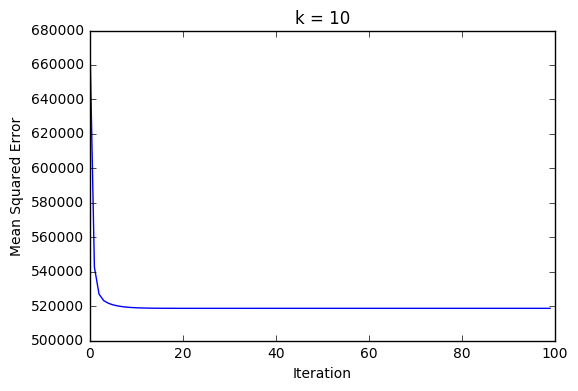

min error: 344352.041737


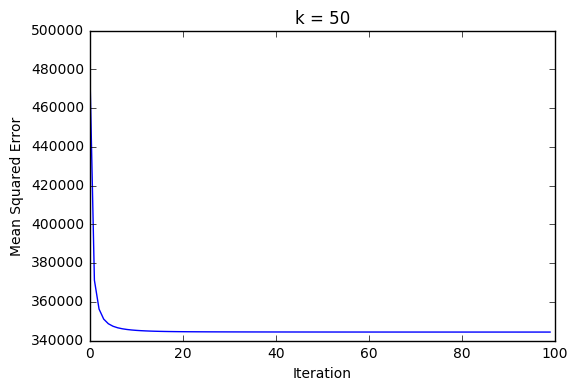

min error: 228779.638112


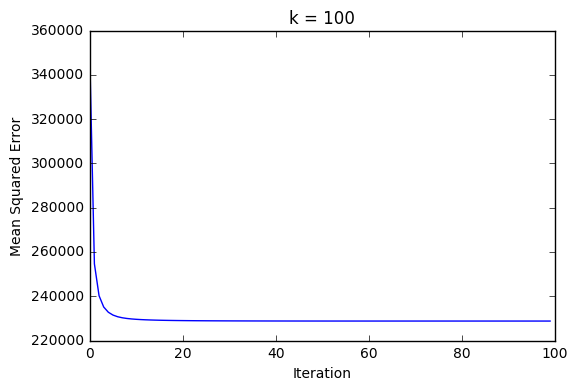

min error: 7326.29039136


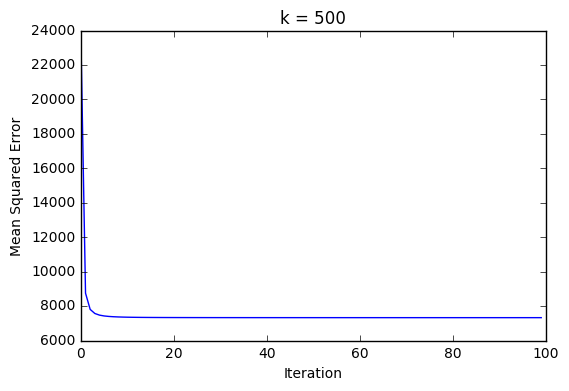

In [10]:
m, n = R.shape
n_iterations = 100
min_error = np.inf
for k in (10, 50, 100, 500):
    U = 5 * np.random.rand(m, k) 
    V = 5 * np.random.rand(k, n)
    errors = []
    for it in range(n_iterations):
        U = np.linalg.solve(np.dot(V, V.T), np.dot(V, R.T)).T
        V = np.linalg.solve(np.dot(U.T, U), np.dot(U.T, R)) 
        error = get_error(R, U, V, W)                
        errors.append(error)
        if error<min_error:
            min_error = error
            R_hat = np.dot(U, V)

    print("min error:", min_error)
    plt.plot(errors)
    plt.title("k = %d" % k)
    plt.ylabel("Mean Squared Error")
    plt.xlabel("Iteration")
    plt.show()

In [11]:
R_hat

array([[  5.03096671e+00,   3.06880019e+00,   3.94849406e+00, ...,
         -1.46997325e-02,  -1.50539632e-02,   1.47388250e-02],
       [  3.98985285e+00,   9.65260438e-02,   2.96377753e-01, ...,
         -3.74810894e-02,   2.26637879e-02,   1.99156847e-02],
       [  2.16740038e-02,   7.52089508e-02,   5.13174312e-02, ...,
          4.46538262e-02,   3.01282878e-02,  -3.65733152e-02],
       ..., 
       [  5.01085452e+00,  -3.05489783e-02,  -1.23940740e-02, ...,
          4.69772950e-03,  -1.10231170e-02,   5.48073138e-03],
       [  6.43576274e-03,   3.64801392e-01,   9.79937174e-02, ...,
         -1.16986967e-02,   1.43284381e-02,  -2.33324343e-02],
       [ -5.81241306e-02,   4.91624373e+00,   1.46611202e-01, ...,
          3.26081156e-02,   5.19435628e-02,  -1.30980960e-02]])